In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.data import AUTOTUNE

2025-02-02 15:50:56.579384: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-02 15:50:56.692312: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-02 15:50:57.184223: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-02 15:50:58.697023: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
import os

# Déterminer le dossier parent du répertoire de travail
base_dir = os.getcwd()  # Chemin du répertoire courant
results_dir = os.path.join(base_dir, "..", "results")  # Dossier results dans le parent

# Création du dossier results/ s'il n'existe pas
os.makedirs(results_dir, exist_ok=True)

print("Dossier results créé à :", results_dir)


Dossier results créé à : /home/yuba/Bureau/Python/CNN/Alzheimer/notebooks/../results


In [2]:
# Définition des paramètres
IMG_SIZE = (150, 150)     # Taille des images
BATCH_SIZE = 32
EPOCHS = 50               # Nombre d'époques élevé pour tenter d'atteindre 80 % de précision

In [6]:
# Chemins vers vos dossiers de données
TRAIN_DIR = '/home/yuba/Bureau/Python/CNN/Alzheimer/Alzheimer_s Dataset/train'
VALIDATION_DIR = '/home/yuba/Bureau/Python/CNN/Alzheimer/Alzheimer_s Dataset/test'

In [7]:
# Chargement des datasets 
# Cette fonction lit les images depuis les répertoires et génère automatiquement les labels basés sur le nom des dossiers.
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    labels='inferred',         # Les labels sont inférés depuis le nom des sous-dossiers
    label_mode='categorical',  # Pour la classification multi-classes (4 classes)
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=123
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_DIR,
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=123
)

Found 5121 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.


In [8]:
# Optimisation des performances : mise en cache et préchargement
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)



In [9]:
# Définition du modèle CNN
model = models.Sequential([
    # La couche de rescaling normalise les pixels entre 0 et 1
    layers.Rescaling(1./255, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),

    # Bloc de convolution 1
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Bloc de convolution 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Bloc de convolution 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Bloc de convolution 4
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Passage en couche entièrement connectée
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Pour réduire le surapprentissage

    # Couche de sortie à 4 neurones (une par classe) avec activation softmax
    layers.Dense(4, activation='softmax')
])


/home/yuba/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:

# Compilation du modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [11]:

# Affichage du résumé du modèle
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,660 (13.18 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:

# Entraînement du modèle
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/50


2025-02-02 15:55:08.013218: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89718784 exceeds 10% of free system memory.
2025-02-02 15:55:08.146791: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.
2025-02-02 15:55:08.630970: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.
2025-02-02 15:55:08.896231: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44859392 exceeds 10% of free system memory.
2025-02-02 15:55:08.896327: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89718784 exceeds 10% of free system memory.


161/161 ━━━━━━━━━━━━━━━━━━━━ 150s 907ms/step - accuracy: 0.4710 - loss: 1.0742 - val_accuracy: 0.5387 - val_loss: 0.9778
Epoch 2/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 138s 857ms/step - accuracy: 0.5484 - loss: 0.9414 - val_accuracy: 0.5536 - val_loss: 0.9254
Epoch 3/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 136s 844ms/step - accuracy: 0.6192 - loss: 0.7905 - val_accuracy: 0.5152 - val_loss: 1.0052
Epoch 4/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 136s 847ms/step - accuracy: 0.7257 - loss: 0.6059 - val_accuracy: 0.5731 - val_loss: 0.9216
Epoch 5/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 136s 843ms/step - accuracy: 0.8468 - loss: 0.3984 - val_accuracy: 0.5715 - val_loss: 1.0503
Epoch 6/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 138s 855ms/step - accuracy: 0.9099 - loss: 0.2283 - val_accuracy: 0.6145 - val_loss: 1.1583
Epoch 7/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 141s 849ms/step - accuracy: 0.9703 - loss: 0.0910 - val_accuracy: 0.6560 - val_loss: 1.0331
Epoch 8/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 142s 851ms/step - accuracy: 0.9797 - loss: 0.06

In [13]:

# Sauvegarde du modèle entraîné
model.save("alzheimer_cnn_model.h5")

In [14]:
import matplotlib.pyplot as plt

# Récupération des métriques dans l'objet 'history'
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)


Text(0.5, 1.0, 'Précision entraînement et validation')

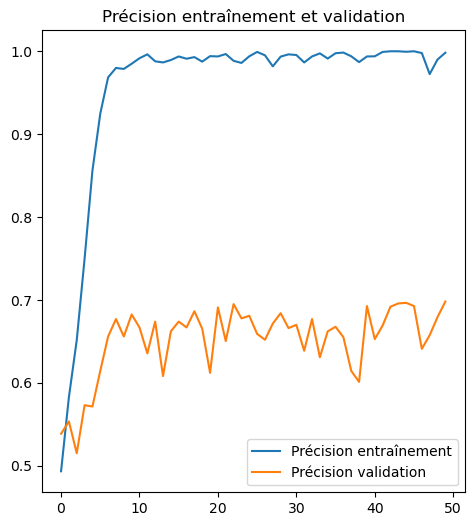

In [15]:

# Affichage des courbes de précision
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Précision entraînement')
plt.plot(epochs_range, val_acc, label='Précision validation')
plt.legend(loc='lower right')
plt.title('Précision entraînement et validation')
plt.savefig(os.path.join(results_dir, "Précision entraînement et validation.png"))



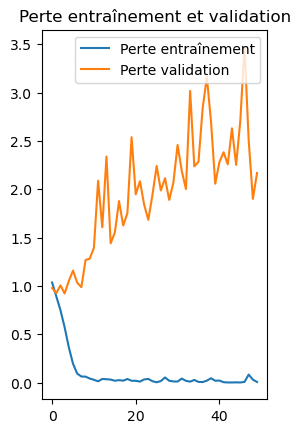

In [16]:

# Affichage des courbes de perte
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perte entraînement')
plt.plot(epochs_range, val_loss, label='Perte validation')
plt.legend(loc='upper right')
plt.title('Perte entraînement et validation')

plt.savefig(os.path.join(results_dir, "Perte entraînement et validation.png"))
plt.show()



In [17]:
# Affichage des précisions finales
print(f"Précision finale sur l'entraînement : {acc[-1]*100:.2f}%")
print(f"Précision finale sur la validation   : {val_acc[-1]*100:.2f}%")


Précision finale sur l'entraînement : 99.82%
Précision finale sur la validation   : 69.82%


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model

# model = load_model("alzheimer_cnn_model.h5")
# Sinon, si le modèle est déjà dans la variable `model`, continuez.

# Définition des paramètres (doivent correspondre à ceux utilisés pour l'entraînement)
IMG_SIZE = (150, 150)  # Taille d'entrée du modèle


In [20]:

# Chemin vers l'image à tester (remplacez par le chemin de votre image)
image_path = "/home/yuba/Bureau/Python/CNN/Alzheimer/Alzheimer_s Dataset/test/VeryMildDemented/26 (68).jpg"

# Chargement et redimensionnement de l'image
img = load_img(image_path, target_size=IMG_SIZE)
img_array = img_to_array(img)


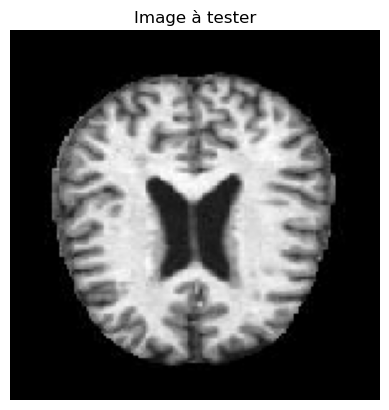

In [22]:
# Afficher l'image originale
plt.imshow(img_array.astype("uint8"))
plt.axis("off")
plt.title("Image à tester")
plt.savefig(os.path.join(results_dir, "Image à tester.png"))
plt.show()



In [23]:
# Préparation de l'image pour le modèle :
# Ajouter une dimension pour simuler un batch de taille 1.
img_batch = np.expand_dims(img_array, axis=0)
# Note : Comme le modèle commence par une couche Rescaling(1./255), il n'est pas nécessaire de normaliser ici.


In [24]:

# Prédiction de la classe
predictions = model.predict(img_batch)
# Récupérer l'indice de la classe prédite et la confiance associée
predicted_index = np.argmax(predictions[0])
confidence = predictions[0][predicted_index]

# Définir les noms de classes (doivent être dans le même ordre que lors de la création du dataset)
class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
predicted_class = class_names[predicted_index]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [25]:

# Affichage du résultat de la prédiction
print(f"Prédiction : {predicted_class} avec une confiance de {confidence * 100:.2f}%")


Prédiction : VeryMildDemented avec une confiance de 100.00%
